In [1]:
from transformers import BertForMaskedLM, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from textwrap import wrap
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
from collections import Counter

import keras
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras 
from keras import backend as K
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from keras.layers import LSTM,Dense,Bidirectional,Input
from keras.models import Model
import torch

import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

/Users/nfanlo/Library/Python/3.8/lib/python/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-01-04 09:09:47.135644: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_train = pd.read_csv('/Users/nfanlo/dev/spanish-classifier-tfg/dataset/60-20-20/train.csv')
print(df_train.shape)
df_train.isnull().sum()
df_train.sentiment.replace("P" , 2 , inplace = True)
df_train.sentiment.replace("N" , 0 , inplace = True)
df_train.sentiment.replace("NEU" , 1, inplace = True)
df_train.head()

(4340, 2)


,text,sentiment
0,"@Jorge_LBU Espero que te mejores pronto, vomit...",0
1,@ClubPaniniMx @PaniniComicsMx genial espero qu...,1
2,kali uchis va a estar en bahidorá,1
3,"@ferdiazgil @FranDguez sí, lo he leído ese tem...",0
4,@AbrahamMateoESP Exacto! Todo lo que él hace l...,1


In [3]:
df_dev = pd.read_csv('/Users/nfanlo/dev/spanish-classifier-tfg/dataset/60-20-20/dev.csv')
print(df_dev.shape)
df_dev.isnull().sum()
df_dev.sentiment.replace("P" , 2 , inplace = True)
df_dev.sentiment.replace("N" , 0 , inplace = True)
df_dev.sentiment.replace("NEU" , 1, inplace = True)
df_dev.head()

(1447, 2)


,text,sentiment
0,ola wapa k tal stas?? spero k no seas una sorr...,0
1,@sigridbazan Tu optimismo es admirable,2
2,Que coraje me dan lxs prepotentxs,0
3,Limo sadboy de mierda la vida es maravillosa,1
4,"Al discurso de Obama le faltó el ""¿Qué hubiera...",1


In [10]:
x_train = df_train.iloc[:, 0]
y_train = df_train.iloc[:, 1]
x_dev = df_dev.iloc[:, 0]
y_dev = df_dev.iloc[:, 1]


In [25]:
#Funcion que CREA + FIT el Naive Bayes
def naive_bayes():
    count_vect = CountVectorizer()
    x_train_count = count_vect.fit_transform(x_train)
    x_dev_count = count_vect.transform(x_dev)

    param_grid = [{'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}]

    mln = MultinomialNB()
    clf = GridSearchCV(mln, param_grid, cv=5)
    clf.fit(x_train_count, y_train)

    print("optimun alpha:{}".format(clf.best_params_['alpha']))

    print("accuracy: {}".format(clf.score(x_dev_count, y_dev)))

    y_dev_pred = clf.predict(x_dev_count)
    conf_matrix = plot_confusion_matrix(clf, x_dev_count, y_dev, cmap=plt.cm.summer, normalize='true')
    plt.show()

    target_names = ['1', '2', '3']
    print(classification_report(y_dev, y_dev_pred, target_names=target_names))


optimun alpha:0.9
accuracy: 0.5473393227366966


/Users/nfanlo/Library/Python/3.8/lib/python/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


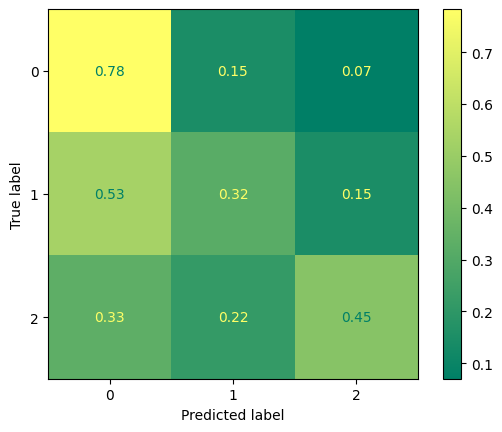

              precision    recall  f1-score   support

           1       0.56      0.78      0.65       599
           2       0.44      0.32      0.37       440
           3       0.63      0.45      0.52       408

    accuracy                           0.55      1447
   macro avg       0.54      0.52      0.52      1447
weighted avg       0.54      0.55      0.53      1447



In [26]:
naive_bayes()